# 3장 컨볼루션 신경망(Convolution Neural Network)

1장에서 각각의 layer가 완전히 연결되어 있는 dense neural network를 통해 MNIST 필기체 글자 dataset을 분류했다.
입력 이미지의 각 픽셀들을 784의 입력 뉴런으로 할당했다. 이때 공간 구조, 관계 정보를 활용하지 않았다. 즉 1차원 벡터로 표현하면서
지역 공간 구조가 사라졌다.

`Convolution Nerual Network(CNN)`은 공간정보를 활용하기 때문에 이미지 분류에 아주 적합하다.


## 심층 컨볼루션 신경망(Deep Convolution Neural Network)DCNN
심층 컨볼루션 신경망은 여러 신경망 계층으로 구선되며 `Convolution` 과 `pooling`이라는 두 유형의 계층이 번갈아 가며 사용된다.
마지막 단계는 일반적으로 하나 이상의 완전 연결 계층으로 구성된다.

## Convolution의 세가지 키 : Receptive Field, 가중치 공유, pooling

### Receptive Field
지역수용필드라고 부른다. 이미지 또는 다른 형태의 데이터에 들어 있는 공간 정보를 보존하려면 각 이미지를 픽셀 행렬로 표시하면 편리하다.
지역구조를 인코딩하는 간단한 방법은 입력 뉴런의 부분 행렬을 다음 계층에 있는 1개의 은닉 뉴런으로 연결하는 것이다. 이때 1개의 은닉 뉴런을
`Receptive Field`라고 하며 이 작업을 `Convolution`이라고 한다.

부분행렬의 크기는 `커널 크기`라고 한다. 컨볼루션의 각 단계에서 커널이 이동하는 픽셀 개수를 `스트라이드길이`라고 한다.

예시 : 
MNIST 이미지를 처리하기 위해 28 * 28 입력 뉴런으로 시작한 다음 은닉층에서 24 * 24 뉴런크기를 갖는(5 * 5의 스트라이드) k개의 특징맵을 불러올 수 있다.


### 가중치 공유 및 편향
동일한 특징을 감지하는 기능을 통해 입력 이미지에 배치된 위치와 독립적으로 학습하기 위해서 은닉층의 모든 뉴런에 대해 동일한 가중치와 편향을 사용할 수 있다.

```python
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
```

하나의 입력 채널로 28 * 28이미지에 3 * 3 컨볼루션을 적용해 32개의 출력 채널을 생성함

### pooling layer
특징 맵의 출력을 요약하기 위해 사용한다. max-pooling과 avg-pooling이 있다.

최댓값 풀링 예제 자리


## DCNN의 예시로 Tensorflow 에서의 LeNet코드

```python
layers.Convolution2D(20, (5, 5), activation('relu'), input_shape=input_shape)
```

첫 번째 매개변수는 컨볼루션의 출력 필터 수이고 다음 튜플은 각 필터의 확장이다.

### 선택적 매개변수 padding
- padding="valid"의 경우 : 입력과 필터가 완전히 겹치는 경우에만 연산을 진행(출력의 크기가 입력의 크기보다 작음)
- padding="same"의 경우 : 입력과 필터가 완전히 겹치지 않는 경우에 대해서도 연산을 진행함(출력의 크기는 입력의 크기와 동일하다)

```python
layers.MaxPooling2D(pool_size=(2, 2), stride(2, 2))
```
(2, 2)는 이미지가 수직 및 수평으로 축소되는 인자를 나타내며 각 차원에 대해서 이미지를 절반으로 줄인다. 스트라이드는 (2, 2)를 처리할 때 사용하는 스트라이드다.


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

#define the convnet 
class LeNet:
	@staticmethod
	def build(input_shape, classes):
		model = models.Sequential()
		# CONV => RELU => POOL
		model.add(layers.Convolution2D(20, (5, 5), activation='relu',
			input_shape=input_shape))
		model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# CONV => RELU => POOL
		model.add(layers.Convolution2D(50, (5, 5), activation='relu'))
		model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# Flatten => RELU layers
		model.add(layers.Flatten())
		model.add(layers.Dense(500, activation='relu'))
		# a softmax classifier
		model.add(layers.Dense(classes, activation="softmax"))
		return model



# network and training
EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT=0.90

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
NB_CLASSES = 10  # number of outputs = number of digits

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# reshape
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

# cast
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
	metrics=["accuracy"])
model.summary()

# use TensorBoard, princess Aurora!
callbacks = [
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

# fit 
history = model.fit(X_train, y_train, 
		batch_size=BATCH_SIZE, epochs=EPOCHS, 
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
		callbacks=callbacks)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])



In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

#define the convnet 
class LeNet:
	@staticmethod
	def build(input_shape, classes):
		model = models.Sequential()
		# CONV => RELU => POOL
		model.add(layers.Convolution2D(20, (5, 5), activation='relu',
			input_shape=input_shape))
		model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# CONV => RELU => POOL
		model.add(layers.Convolution2D(50, (5, 5), activation='relu'))
		model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		# Flatten => RELU layers
		model.add(layers.Flatten())
		model.add(layers.Dense(500, activation='relu'))
		# a softmax classifier
		model.add(layers.Dense(classes, activation="softmax"))
		return model



# network and training
EPOCHS = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT=0.50

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
NB_CLASSES = 10  # number of outputs = number of digits

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# reshape
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

# cast
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
	metrics=["accuracy"])
model.summary()

# use TensorBoard, princess Aurora!
callbacks = [
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]

# fit 
history = model.fit(X_train, y_train, 
		batch_size=BATCH_SIZE, epochs=EPOCHS, 
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
		callbacks=callbacks)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])



60000 train samples
10000 test samples


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 20)     │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 20)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 50)       │        25,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 50)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 500)            │       400,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 431,080 (1.64 MB)

 Trainable params: 431,080 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.8087 - loss: 0.6437 - val_accuracy: 0.9727 - val_loss: 0.0885
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9753 - loss: 0.0775 - val_accuracy: 0.9801 - val_loss: 0.0630
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9857 - loss: 0.0437 - val_accuracy: 0.9836 - val_loss: 0.0529
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9900 - loss: 0.0346 - val_accuracy: 0.9851 - val_loss: 0.0524
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.9908 - loss: 0.0304 - val_accuracy: 0.9856 - val_loss: 0.0480
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9947 - loss: 0.0170 - val_accuracy: 0.9871 - val_loss: 0.0448
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9958 - loss: 0.0122 - val_accuracy: 0.9874 - val_loss: 0.0457
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9978 - loss: 0.0090 - val_accu

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
 
EPOCHS=50
NUM_CLASSES = 10
BATCH_SIZE = 128
    

def load_data():
    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
 
    #normalize 
    mean = np.mean(x_train,axis=(0,1,2,3))
    std = np.std(x_train,axis=(0,1,2,3))
    x_train = (x_train-mean)/(std+1e-7)
    x_test = (x_test-mean)/(std+1e-7)
 
    y_train =  tf.keras.utils.to_categorical(y_train,NUM_CLASSES)
    y_test =  tf.keras.utils.to_categorical(y_test,NUM_CLASSES)

    return x_train, y_train, x_test, y_test

def build_model(): 
    model = models.Sequential()
    
    #1st blocl
    model.add(layers.Conv2D(32, (3,3), padding='same', 
        input_shape=x_train.shape[1:], activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))

    #2nd block
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))

    #3d block 
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.4))

    #dense  
    model.add(layers.Flatten())
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))
    return model

    model.summary()
 

(x_train, y_train, x_test, y_test) = load_data()
model = build_model()
model.compile(loss='categorical_crossentropy', 
            optimizer='RMSprop', 
            metrics=['accuracy'])

#train
batch_size = 64
model.fit(x_train, y_train, batch_size=batch_size,
    epochs=EPOCHS, validation_data=(x_test,y_test)) 
score = model.evaluate(x_test, y_test,
                     batch_size=BATCH_SIZE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


/opt/anaconda3/envs/deep/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-07-15 22:18:00.261582: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2024-07-15 22:18:00.261609: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-07-15 22:18:00.261616: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-07-15 22:18:00.261806: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-15 22:18:00.261816: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:2

Epoch 1/50


2024-07-15 22:18:01.882963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 31ms/step - accuracy: 0.3872 - loss: 2.2248 - val_accuracy: 0.5695 - val_loss: 1.3081
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.6311 - loss: 1.1525 - val_accuracy: 0.6345 - val_loss: 1.1708
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.7074 - loss: 0.9025 - val_accuracy: 0.7019 - val_loss: 0.8982
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.7479 - loss: 0.7494 - val_accuracy: 0.7406 - val_loss: 0.7929
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7764 - loss: 0.6487 - val_accuracy: 0.7824 - val_loss: 0.6431
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.7948 - loss: 0.5954 - val_accuracy: 0.7909 - val_loss: 0.6072
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.8138 - loss: 0.5459 - val_accuracy: 0.7821 - val_loss: 0.6702
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 36ms/step - accuracy: 0.8244 - loss: 0.5044 - val_accurac

```python
#image augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    )
datagen.fit(x_train)
```

### 이미지 증강
`rotation_rage` : 임의로 회전하는 사진의 각도(0~180)
`width_shift`, `height_shift` : 그림을 세로 또는 가로로 임의로 변환하기 위한 범위
`zoom_range` : 사진을 무작위로 확대하기 위한 것
`horizontal_flip` : 이미지의 절반을 가로로 임의 뒤집기하기 위한 것이다.
`fill_mode` : 회전 또는 이동 후에 나타날 수 있는 새 픽셀을 채우는 데 사용되는 전략이다.


## 다음은 이미지 증강이 적용된 코드이다.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
 
EPOCHS=50
NUM_CLASSES = 10
    

def load_data():
    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
 
    #normalize 
    mean = np.mean(x_train,axis=(0,1,2,3))
    std = np.std(x_train,axis=(0,1,2,3))
    x_train = (x_train-mean)/(std+1e-7)
    x_test = (x_test-mean)/(std+1e-7)
 
    y_train =  tf.keras.utils.to_categorical(y_train,NUM_CLASSES)
    y_test =  tf.keras.utils.to_categorical(y_test,NUM_CLASSES)

    return x_train, y_train, x_test, y_test

def build_model(): 
    model = models.Sequential()
    
    #1st blocl
    model.add(layers.Conv2D(32, (3,3), padding='same', 
        input_shape=x_train.shape[1:], activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))

    #2nd block
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))

    #3d block 
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.4))

    #dense  
    model.add(layers.Flatten())
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))
    return model

    model.summary()
 

(x_train, y_train, x_test, y_test) = load_data()
model = build_model()
model.compile(loss='categorical_crossentropy', 
            optimizer='RMSprop', 
            metrics=['accuracy'])

#image augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    )
datagen.fit(x_train)
 
#train
batch_size = 64
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=EPOCHS,
                    verbose=1,validation_data=(x_test,y_test))
#save to disk
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5') 

#test
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0])) 

# 기본 배경 지식을 위한 신경망 공부
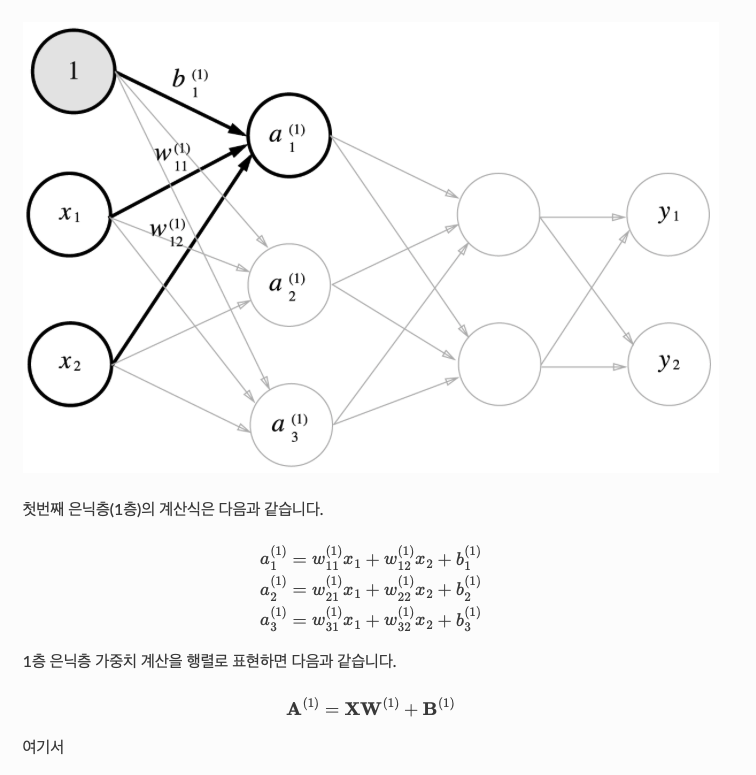

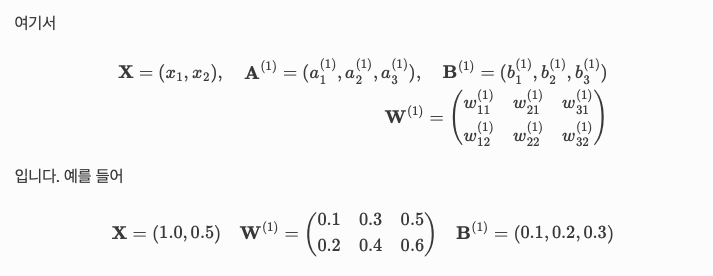

```python
import numpy as np

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],
              [0.2, 0.4, 0.6]])

B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
print(A1)
```
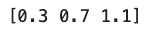

```python
Z1 = sigmoid(A1)
print('A1=', A1)
print('Z1=', Z1)
```

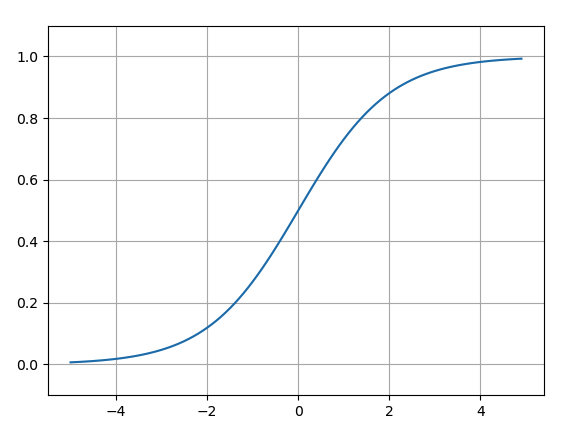

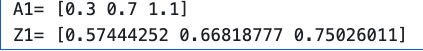

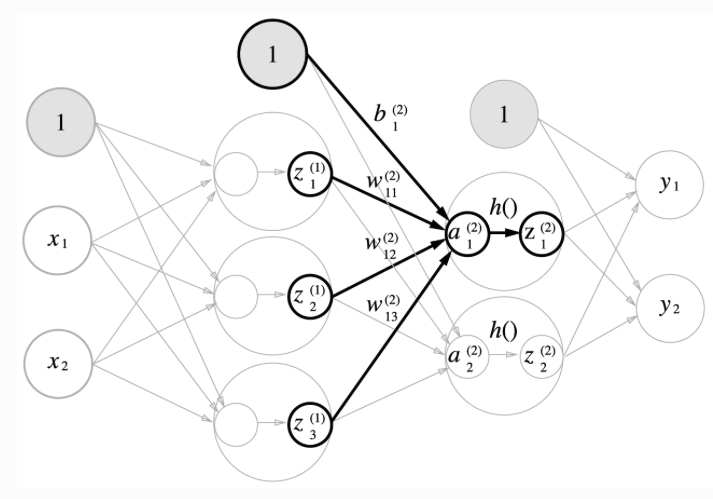

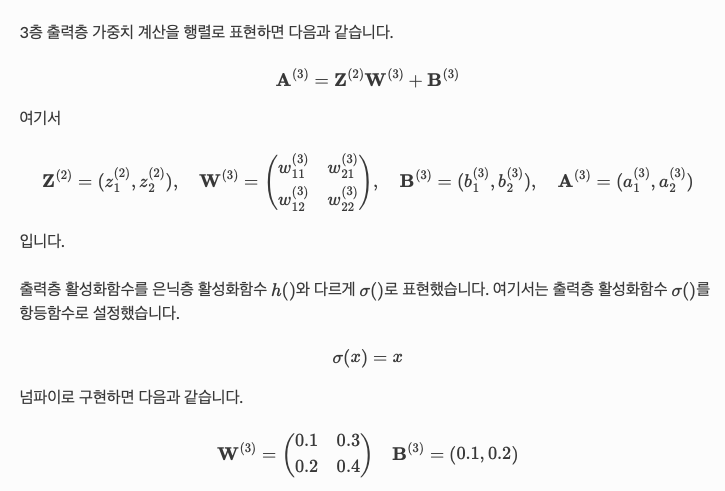


In [6]:
import numpy as np

def sigmoid(x):
   return 1 / (1 + np.exp(-x))

X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],
              [0.2, 0.4, 0.6]])

B1 = np.array([0.1, 0.2, 0.3])

A1 = np.dot(X, W1) + B1
print(A1)

Z1 = sigmoid(A1)
print('A1=', A1)
print('Z1=', Z1)


W2 = np.array([[0.1, 0.4],
               [0.2, 0.5],
               [0.3, 0.6]])
B2 = np.array([0.1, 0.2])
A2 = np.dot(Z1, W2) + B2

Z2 = sigmoid(A2)
print(Z2)

def identity_function(x):
   return x
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])
A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)
print(Y)


[0.3 0.7 1.1]
A1= [0.3 0.7 1.1]
Z1= [0.57444252 0.66818777 0.75026011]
[0.62624937 0.7710107 ]
[0.31682708 0.69627909]


# Convolution

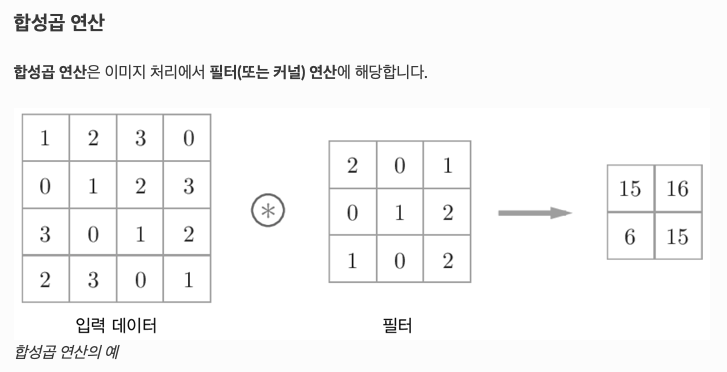

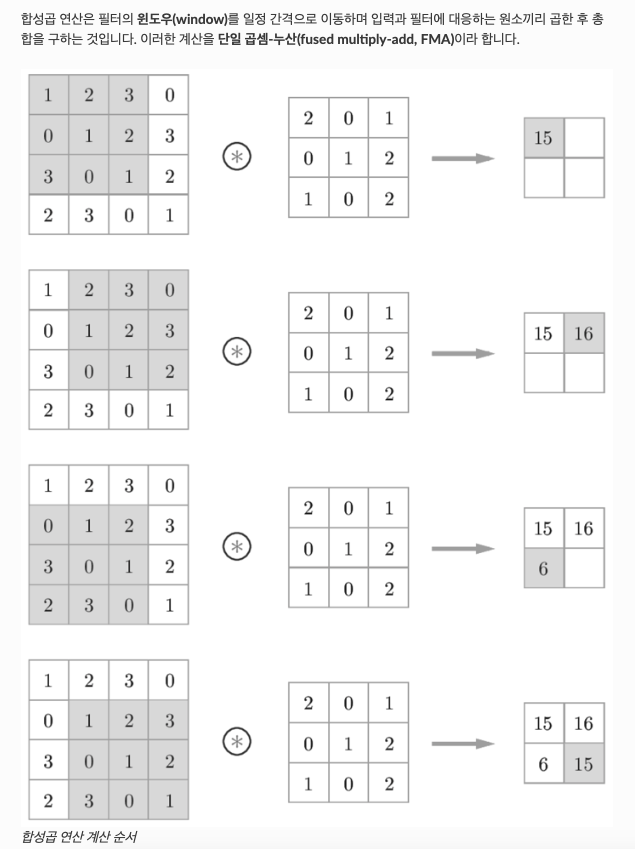

https://compmath.korea.ac.kr/deeplearning/_images/im2col.gif